# Lecture 5 - Exponential Model, Goodness-of-Fit and The Curse of Dimensionality

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

In [2]:
def NoisySinusoidalData(N, a, b, gVar):
    x = np.linspace(a,b,N)
    noise = npr.normal(0,gVar,N)
    t = np.sin(2*np.pi*x) + noise
    return x, t

def PolynomialRegression(x,t,M):
    X = np.array([x**m for m in range(M)]).T
    w = np.linalg.inv(X.T@X)@X.T@t
    y = X@w
    error = t-y
    return w, y, error

def PolynomialRegression_test(x,M,w):
    X = np.array([x**m for m in range(M)]).T 
    y = X@w
    return y

## Another Example

Let's take a look at COVID-19 data from the state of Florida. Data obtained from the [CDC COVID Data Tracker](https://covid.cdc.gov/covid-data-tracker/#trends_dailytrendscases) on August 31, 2021.

In [3]:
import pandas as pd

In [4]:
data = pd.read_csv('data_table_for_total_cases__florida.csv')

In [5]:
data

,State,Date,Total Cases
0,Florida,Aug 29 2021,3231846
1,Florida,Aug 28 2021,3218824
2,Florida,Aug 27 2021,3201134
3,Florida,Aug 26 2021,3179752
4,Florida,Aug 25 2021,3151950
...,...,...,...
580,Florida,Jan 27 2020,0
581,Florida,Jan 26 2020,0
582,Florida,Jan 25 2020,0
583,Florida,Jan 24 2020,0


In [6]:
data.columns

Index(['State', 'Date', 'Total Cases'], dtype='object')

In [7]:
cases = data['Total Cases'].values[::-1]
date = data['Date'].values[::-1]

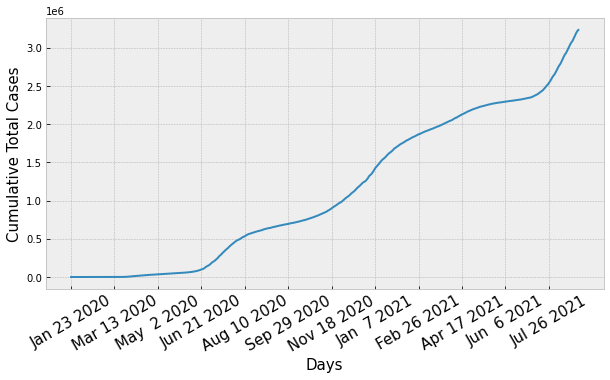

In [8]:
plt.figure(figsize=(10,5))
plt.plot(cases)
plt.xlabel('Days', size=15)
plt.ylabel('Cumulative Total Cases', size=15)
plt.xticks(range(0,len(cases),50), date[range(0,len(cases),50)],rotation=30,size=15);

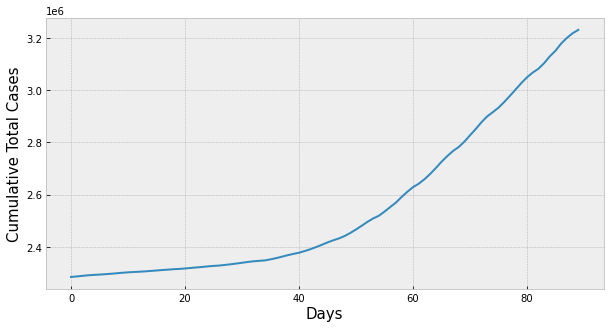

In [9]:
plt.figure(figsize=(10,5))

plt.plot(cases[-90:])

plt.xlabel('Days', size=15)
plt.ylabel('Cumulative Total Cases', size=15);

Let's fit a **polynomial regression** model that predicts the number of daily new cases of COVID-19 in Florida.

In [10]:
x = np.array(range(90)) # input data

t = cases[-90:] # target labels

In [11]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89])

In [12]:
t

array([2284447, 2286292, 2288679, 2290825, 2292313, 2293538, 2294960,
       2296651, 2298524, 2300519, 2302109, 2303459, 2304479, 2305824,
       2307577, 2309125, 2310987, 2312448, 2314143, 2315191, 2316969,
       2318968, 2320889, 2322786, 2324907, 2326707, 2328226, 2330546,
       2332999, 2335884, 2338779, 2341943, 2344416, 2346202, 2347914,
       2351861, 2356706, 2362201, 2367726, 2372799, 2377358, 2383832,
       2390871, 2399144, 2407700, 2416936, 2424928, 2432108, 2441403,
       2453176, 2466566, 2480834, 2495683, 2508738, 2519032, 2535087,
       2552585, 2569567, 2591275, 2611054, 2628812, 2641964, 2659034,
       2679248, 2702021, 2726152, 2747650, 2767207, 2782516, 2802985,
       2827738, 2851644, 2877593, 2899894, 2916330, 2933550, 2955289,
       2978811, 3003315, 3027819, 3050081, 3068144, 3082829, 3104141,
       3130500, 3151950, 3179752, 3201134, 3218824, 3231846], dtype=int64)

Let's compute the optimal set of parameters for the foam height model for each brand:

In [13]:
M = 3

w, y, e = PolynomialRegression(x, t, M)

In [14]:
print('Model Coefficients: w=',w)

Model Coefficients: w= [ 2.33623443e+06 -6.03605864e+03  1.84133592e+02]


In [15]:
y

array([2336234.43350855, 2330382.50846072, 2324898.85059711,
       2319783.4599177 , 2315036.3364225 , 2310657.48011151,
       2306646.89098473, 2303004.56904215, 2299730.51428379,
       2296824.72670963, 2294287.20631968, 2292117.95311393,
       2290316.9670924 , 2288884.24825507, 2287819.79660195,
       2287123.61213304, 2286795.69484834, 2286836.04474785,
       2287244.66183156, 2288021.54609948, 2289166.69755161,
       2290680.11618795, 2292561.8020085 , 2294811.75501325,
       2297429.97520221, 2300416.46257538, 2303771.21713276,
       2307494.23887435, 2311585.52780015, 2316045.08391015,
       2320872.90720436, 2326068.99768278, 2331633.3553454 ,
       2337565.98019224, 2343866.87222328, 2350536.03143853,
       2357573.45783799, 2364979.15142166, 2372753.11218954,
       2380895.34014162, 2389405.83527791, 2398284.59759841,
       2407531.62710312, 2417146.92379203, 2427130.48766516,
       2437482.31872249, 2448202.41696403, 2459290.78238978,
       2470747.41499974,

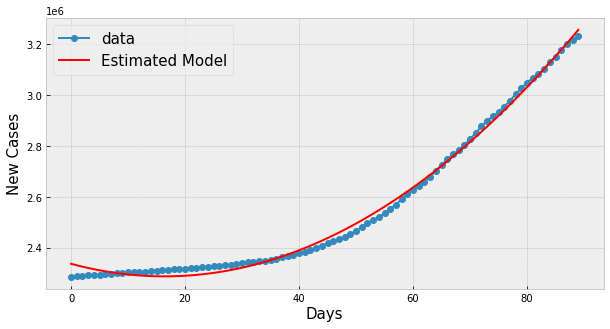

In [16]:
plt.figure(figsize=(10,5))
plt.plot(x, t,'-o', label='data')
plt.plot(x, y, 'r', label='Estimated Model')
plt.xlabel('Days', size=15)
plt.ylabel('New Cases', size=15)
plt.legend(fontsize=15);

**What is the predicted daily new cases for the next 3 days?**

In [17]:
prediction = PolynomialRegression_test(np.array([90,91,92]),M,w)

prediction

array([3284471.25195779, 3311763.37348869, 3339423.76220381])

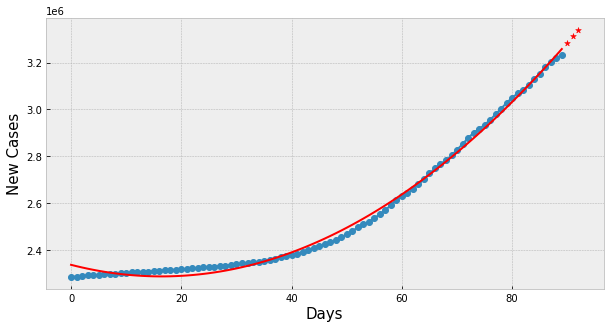

In [18]:
plt.figure(figsize=(10,5))
plt.plot(x, t,'-o', label='data')
plt.plot(x, y, 'r', label='Estimated Model')
plt.scatter([90,91,92], prediction, marker='*',c='r')
plt.xlabel('Days', size=15)
plt.ylabel('New Cases', size=15);

### Observations

* We did not encode any type of physical behavior into the model, (for example, enforcing the cumulative number of new cases to be the same or larger than the previous day), the model is not able to transcribe them.

* The prediction point falls outside the region in which the model was trained and therefore the predictions might not be reliable. We can compute confidence intervals to access our confidence in these predictions.

* The **model choice** also plays an important factor in the prediction. What if we considered an exponential model?

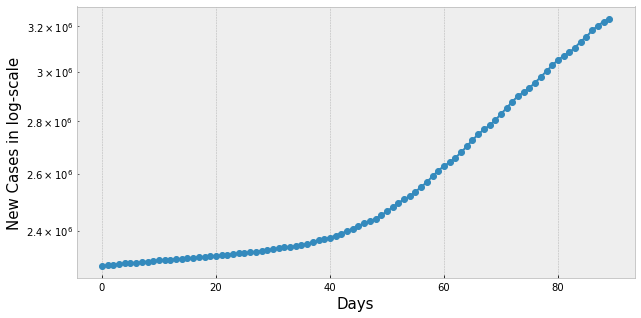

In [19]:
plt.figure(figsize=(10,5))
plt.plot(x, t,'-o')
plt.yscale('log')
plt.xlabel('Days', fontsize=15)
plt.ylabel('New Cases in log-scale', fontsize=15);

In [20]:
t_log = np.log(t)

Now that we have transformed the desired label as its logarithm, our goal is to fit a linear model to approximate:

\begin{align}
w_0 + w_1\mathbf{x}+\dots+w_M\mathbf{x}^M &= \ln(t) \\
\iff e^{w_0 + w_1\mathbf{x}+\dots+w_M\mathbf{x}^M} &= t
\end{align}

In [21]:
M = 3

w_log, y_log, e_log = PolynomialRegression(x, t_log, M)

In [22]:
w_log

array([ 1.46567025e+01, -1.74923761e-03,  6.37131156e-05])

In [23]:
y_exp = np.exp(w_log[0] + w_log[1]*x + w_log[2]*x**2)

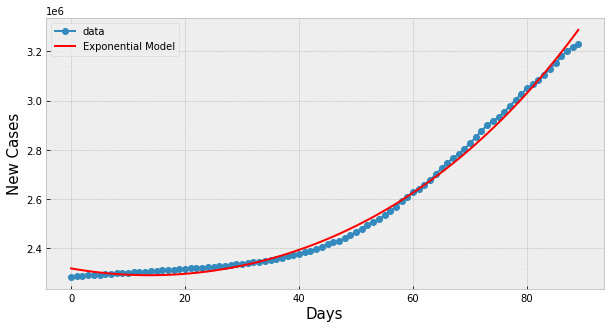

In [24]:
plt.figure(figsize=(10,5))
plt.plot(x, t,'-o', label='data')
plt.plot(x, y_exp,'r', label='Exponential Model')
plt.xlabel('Days', fontsize=15)
plt.ylabel('New Cases', fontsize=15)
plt.legend();

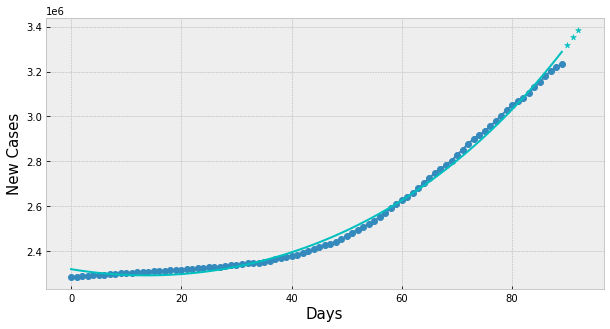

In [25]:
pred_exp = np.exp(w_log[0] + w_log[1]*np.array([90,91,92]) + w_log[2]*np.array([90,91,92])**2)

plt.figure(figsize=(10,5))
plt.plot(x, t,'-o', label='data')
plt.plot(x, y_exp, 'c', label='Exponential Model')
plt.scatter([90,91,92], pred_exp, marker='*',c='c')
plt.xlabel('Days', fontsize=15)
plt.ylabel('New Cases', fontsize=15);

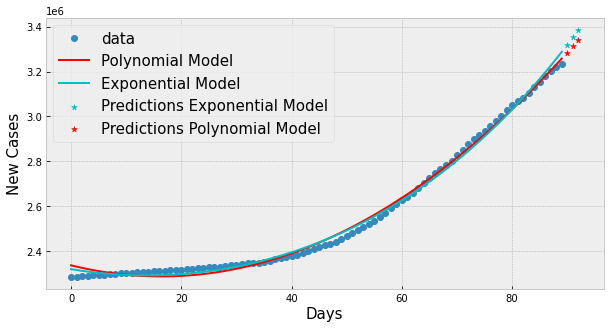

In [26]:
plt.figure(figsize=(10,5))
plt.plot(x, t,'o', label='data')
plt.plot(x, y, 'r', label='Polynomial Model')
plt.plot(x,  y_exp, 'c', label='Exponential Model')
plt.scatter([90,91,92], pred_exp, marker='*',c='c',label='Predictions Exponential Model')
plt.scatter([90,91,92], prediction, marker='*',c='r',label='Predictions Polynomial Model')
plt.xlabel('Days', fontsize=15)
plt.ylabel('New Cases', fontsize=15)
plt.legend(fontsize=15);

In order to validate the model, we typically split the **training data** into 2 steps:

* Training set
* Validation set

We use the **training set** to find the best parameters and the **validation set** to evaluate if the model is still performing well.

### Goodness-of-Fit Measures

**Which _quantitative_ measure would you use to compare model performances?**

#### Error Measures

In [27]:
print('              STATISTICS               |          Polynomial        |  Exponential ')
print(' Mean Squared Error (MSE)              |       ',np.round(np.mean((t-y)**2),3), '      | ', \
np.round(np.mean((t-y_exp)**2),3))
print('Normalized Mean Squared Error (NMSE)   |          ',np.round(np.mean((t-y)**2/(t-np.mean(t))**2),3), \
 '           | ', np.round(np.mean((t-y_exp)**2/(t-np.mean(t))**2),3))
print(' Mean Absolute Error (MAE)             |         ',np.round(np.mean(np.abs(t-y)),3), '         | ', \
np.round(np.mean(np.abs(t-y_exp)),3))
print('Normalized Mean Absolute Error (NMAE)  |          ',np.round(np.mean(np.abs((t-y)/t)),3), \
 '           | ', np.round(np.mean(np.abs((t-y_exp)/t)),3))

              STATISTICS               |          Polynomial        |  Exponential 
 Mean Squared Error (MSE)              |        386206498.157       |  362611855.047
Normalized Mean Squared Error (NMSE)   |           0.448            |  0.198
 Mean Absolute Error (MAE)             |          16819.39          |  16513.116
Normalized Mean Absolute Error (NMAE)  |           0.007            |  0.006


#### Hypothesis Testing

The **mean-difference hypothesis test** essentially poses the two hypothesis:

$H_0$: the predicted values come from the same distribution as the target values

$H_1$: the predicted values do not come from the same distribution

If we consider a significance level of $\alpha=0.05$, can we accept the null hypothesis?

* Let's build a simulation for this:

In [28]:
diff = np.mean(t-y)
diff

-1.5765221582518683e-08

In [29]:
num_sims = 100_000
event_count = 0
for sim in range(num_sims):
    sample_t = np.random.choice(t,size=len(t)) # Bootstrap sampling
    sample_y = np.random.choice(y,size=len(y))   # Bootstrap sampling
    if np.abs(np.mean(sample_t-sample_y))>=np.abs(diff):
        event_count+=1
print('p-value: Prob. of seeing average difference of ',diff,' under H0 is ~ ',event_count/num_sims)

p-value: Prob. of seeing average difference of  -1.5765221582518683e-08  under H0 is ~  1.0


**Conclusion:** The *p-value* is larger than the significance level $\alpha$, therefore the result is not statistically significant. We cannot reject the null hypothesis. The data indicates that the predicted values have the same distribution as the target values.

In other words, the model is a good fit for the data.

We can repeat the same test for the exponential model:

In [30]:
diff = np.mean(t-y_exp)

num_sims = 100_000
event_count = 0
for sim in range(num_sims):
    sample_t = np.random.choice(t,size=len(t)) # Bootstrap sampling
    sample_y = np.random.choice(y_exp,size=len(y_exp))   # Bootstrap sampling
    if np.abs(np.mean(sample_t-sample_y))>=np.abs(diff):
        event_count+=1
print('p-value: Prob. of seeing average difference of ',diff,' under H0 is ~ ',event_count/num_sims)

p-value: Prob. of seeing average difference of  62.1934843597468  under H0 is ~  0.99893


#### Q-Q Plot

We can also use the **Quantile-Quantile (Q-Q)** plot to assess qualitative measures of goodness-of-fit.

* The Q-Q plot help us assess if a set of data plausibly came from some theoretical distribution such as a Normal or exponential, or if two sets of samples were drawn from the same distribution. For example, if we run a statistical analysis that assumes our dependent variable is Normally distributed, we can use a Normal Q-Q plot to check that assumption. It's just a visual check, not an air-tight proof, so it is somewhat subjective. But it allows us to see at-a-glance if our assumption is plausible, and if not, how the assumption is violated and what data points contribute to the violation.

* What are *quantiles*? These are often referred to as *percentiles*. These are points in your data below which a certain proportion of your data fall which are captured in the Cumulative Distribution Function (CDF) of a random variable. For example, imagine the classic bell-curve standard Normal distribution with a mean of 0. The 0.5 quantile, or 50th percentile, is 0. Half the data lie below 0. That's the peak of the hump in the curve. The 0.95 quantile, or 95th percentile, is about 1.64. 95 percent of the data lie below 1.64.

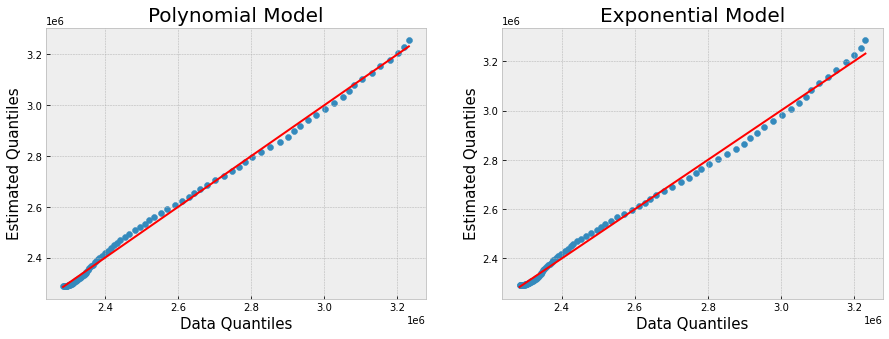

In [31]:
base = np.linspace(min(t),max(t),100)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1); plt.scatter(np.sort(t), np.sort(y))
plt.plot(base,base,'r')
plt.xlabel('Data Quantiles', size=15)
plt.ylabel('Estimated Quantiles', size=15)
plt.title('Polynomial Model',size=20)
plt.subplot(1,2,2); plt.scatter(np.sort(t), np.sort(y_exp))
plt.plot(base,base,'r')
plt.xlabel('Data Quantiles', size=15)
plt.ylabel('Estimated Quantiles', size=15)
plt.title('Exponential Model',size=20);

And then take a summative **quantitative** measure, namely the **coefficient of determination**.

In [32]:
import scipy.stats as stats

print('POLYNOMIAL MODEL')
m, b, r, p, _ = stats.linregress(np.sort(t), np.sort(y))
print('Coefficient of Determination: ',r**2)
print('Slope: ',m)
print('Intercept: ',b)
print('p-value: ', p)
print('-------------------')
print('EXPONENTIAL MODEL')
m, b, r, p, _ = stats.linregress(np.sort(t), np.sort(y_exp))
print('Coefficient of Determination: ',r**2)
print('Slope: ',m)
print('Intercept: ',b)
print('p-value: ', p)

POLYNOMIAL MODEL
Coefficient of Determination:  0.9976231563032427
Slope:  0.9965408269195843
Intercept:  8843.497742990963
p-value:  2.9716497495238486e-117
-------------------
EXPONENTIAL MODEL
Coefficient of Determination:  0.9965817017609453
Slope:  0.9970639331562267
Intercept:  7443.964751299471
p-value:  2.6111379260690532e-110


For most applications, we want a model with a coefficient of determination $r^2\geq99\%$.

___

As we saw from earlier examples, the number of parameters we need to estimate (model order in these examples) will determine the complexity of the model. As the model becomes more complexity, it will tend to **overfit**, that is, to memorize the training set samples and perform poorly in the validation set.

Model complexity is heavily tied with model overfitting, but **high-dimensional feature spaces** also introduces other phenomena that does occur in lower-dimensional spaces. This phenomena is referred to as the **Curse of Dimensionality**.

After all, the more features we have the better, right?! Maybe not...

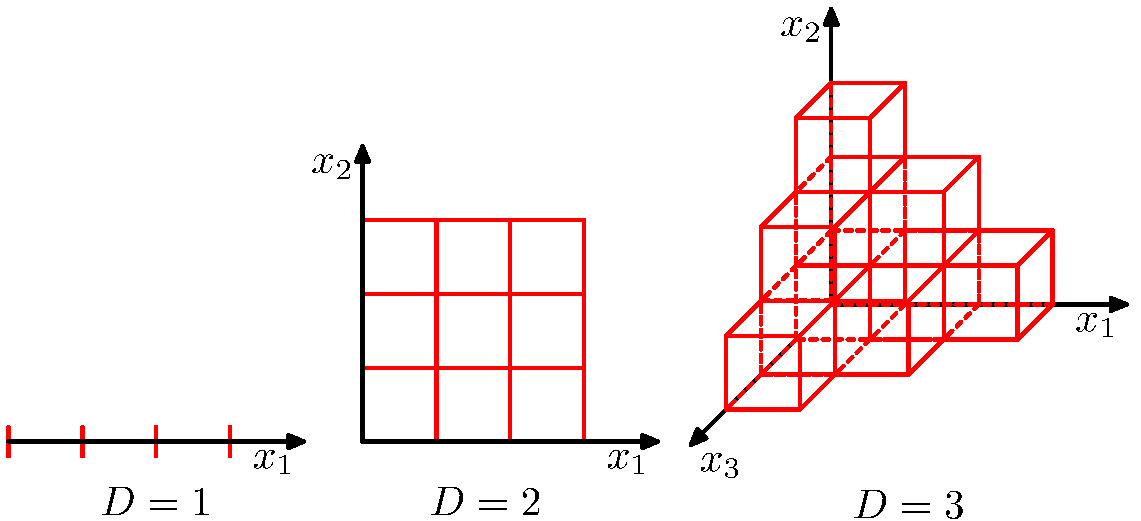

In [1]:
from IPython.display import Image
Image('figures/Dimensions.png', width=900)

# The Curse of Dimensionality 

* The Curse of Dimensionality illustrates various phenomena that arise when we work with high-dimensional data spaces that would not otherwise occur in lower-dimensional settings (such as the 3-dimensional space).

Let's consider the following data set representing measurements taken from a pipeline containing a mixture of oil, water,
and gas (Bishop, 2006).

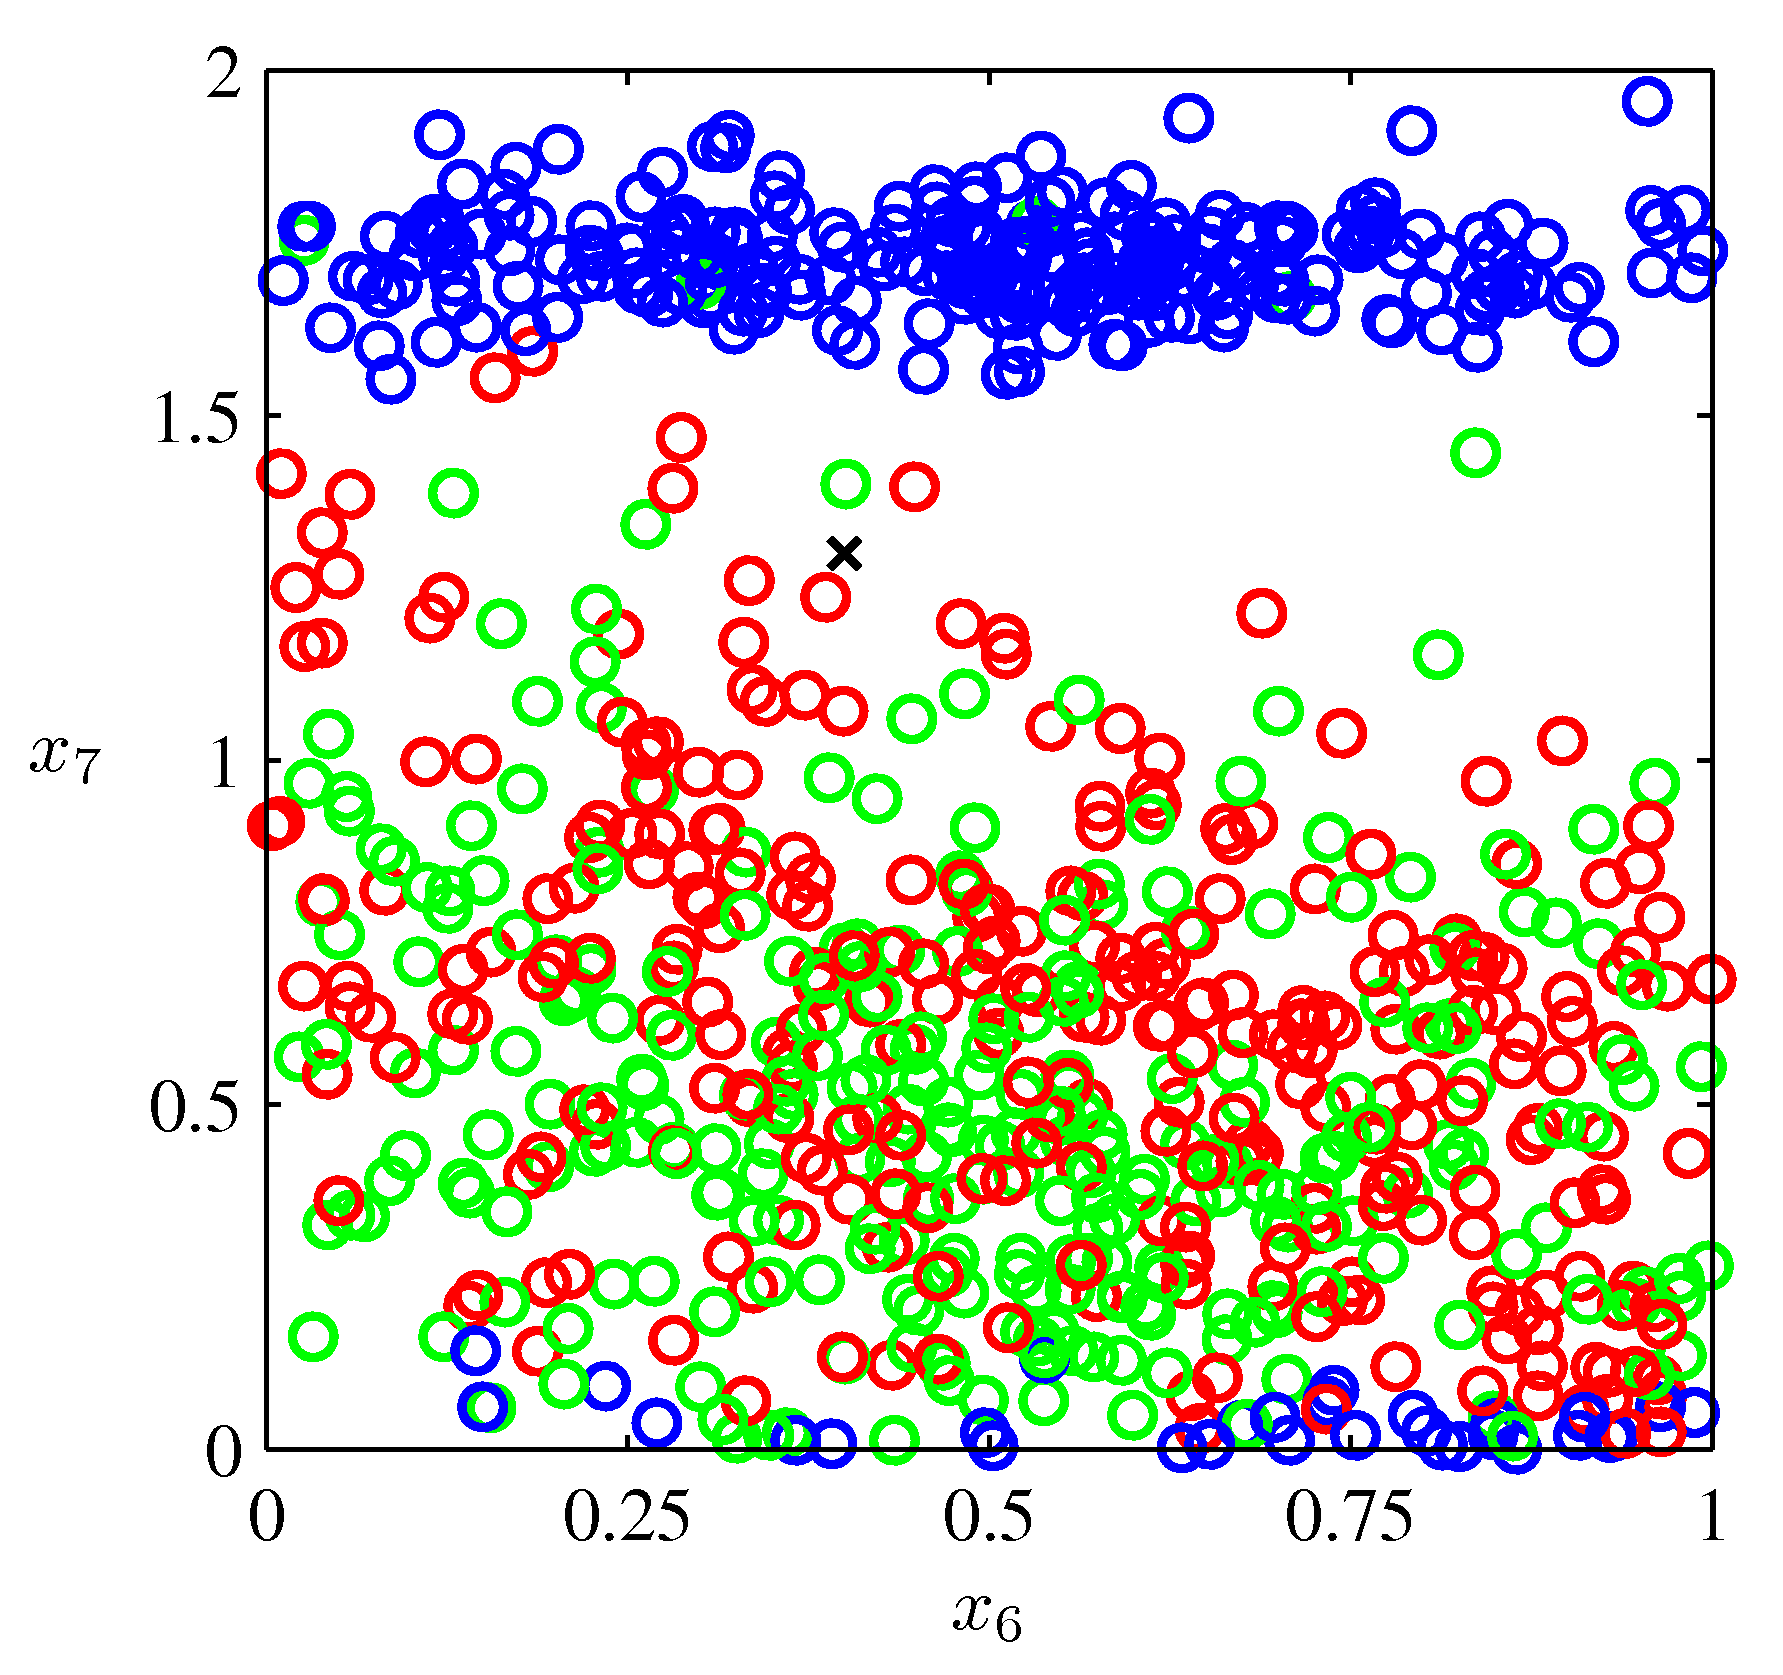

In [2]:
Image('figures/Figure1.19.png', width=400)

Each data point comprises a 12-dimensional input vector consisting of measurements taken with gamma ray densitometers that measure the attenuation of gamma rays passing along narrow beams through the pipe.

* We observe that the cross is surrounded by numerous red points, and so we might suppose that it belongs to the red class. 

* However, there are also plenty of green points nearby, so we might think that it could instead belong to the green class. It seems unlikely that it belongs to the blue class. 

* The intuition here is that the identity of the cross should be determined more strongly by nearby points from the training set and less strongly by more distant points.

**How can we turn this intuition into a learning algorithm?** 

* One very simple approach would be to divide the input space into regular cells, as indicated in the figure below. When we are given a test point and we wish to predict its class, we first decide which cell it belongs to, and we then find all of the training data points that fall in the same cell. 

* The identity of the test point is predicted as being the same as the class having the largest number of training points in the same cell as the test point (with ties being broken at random).

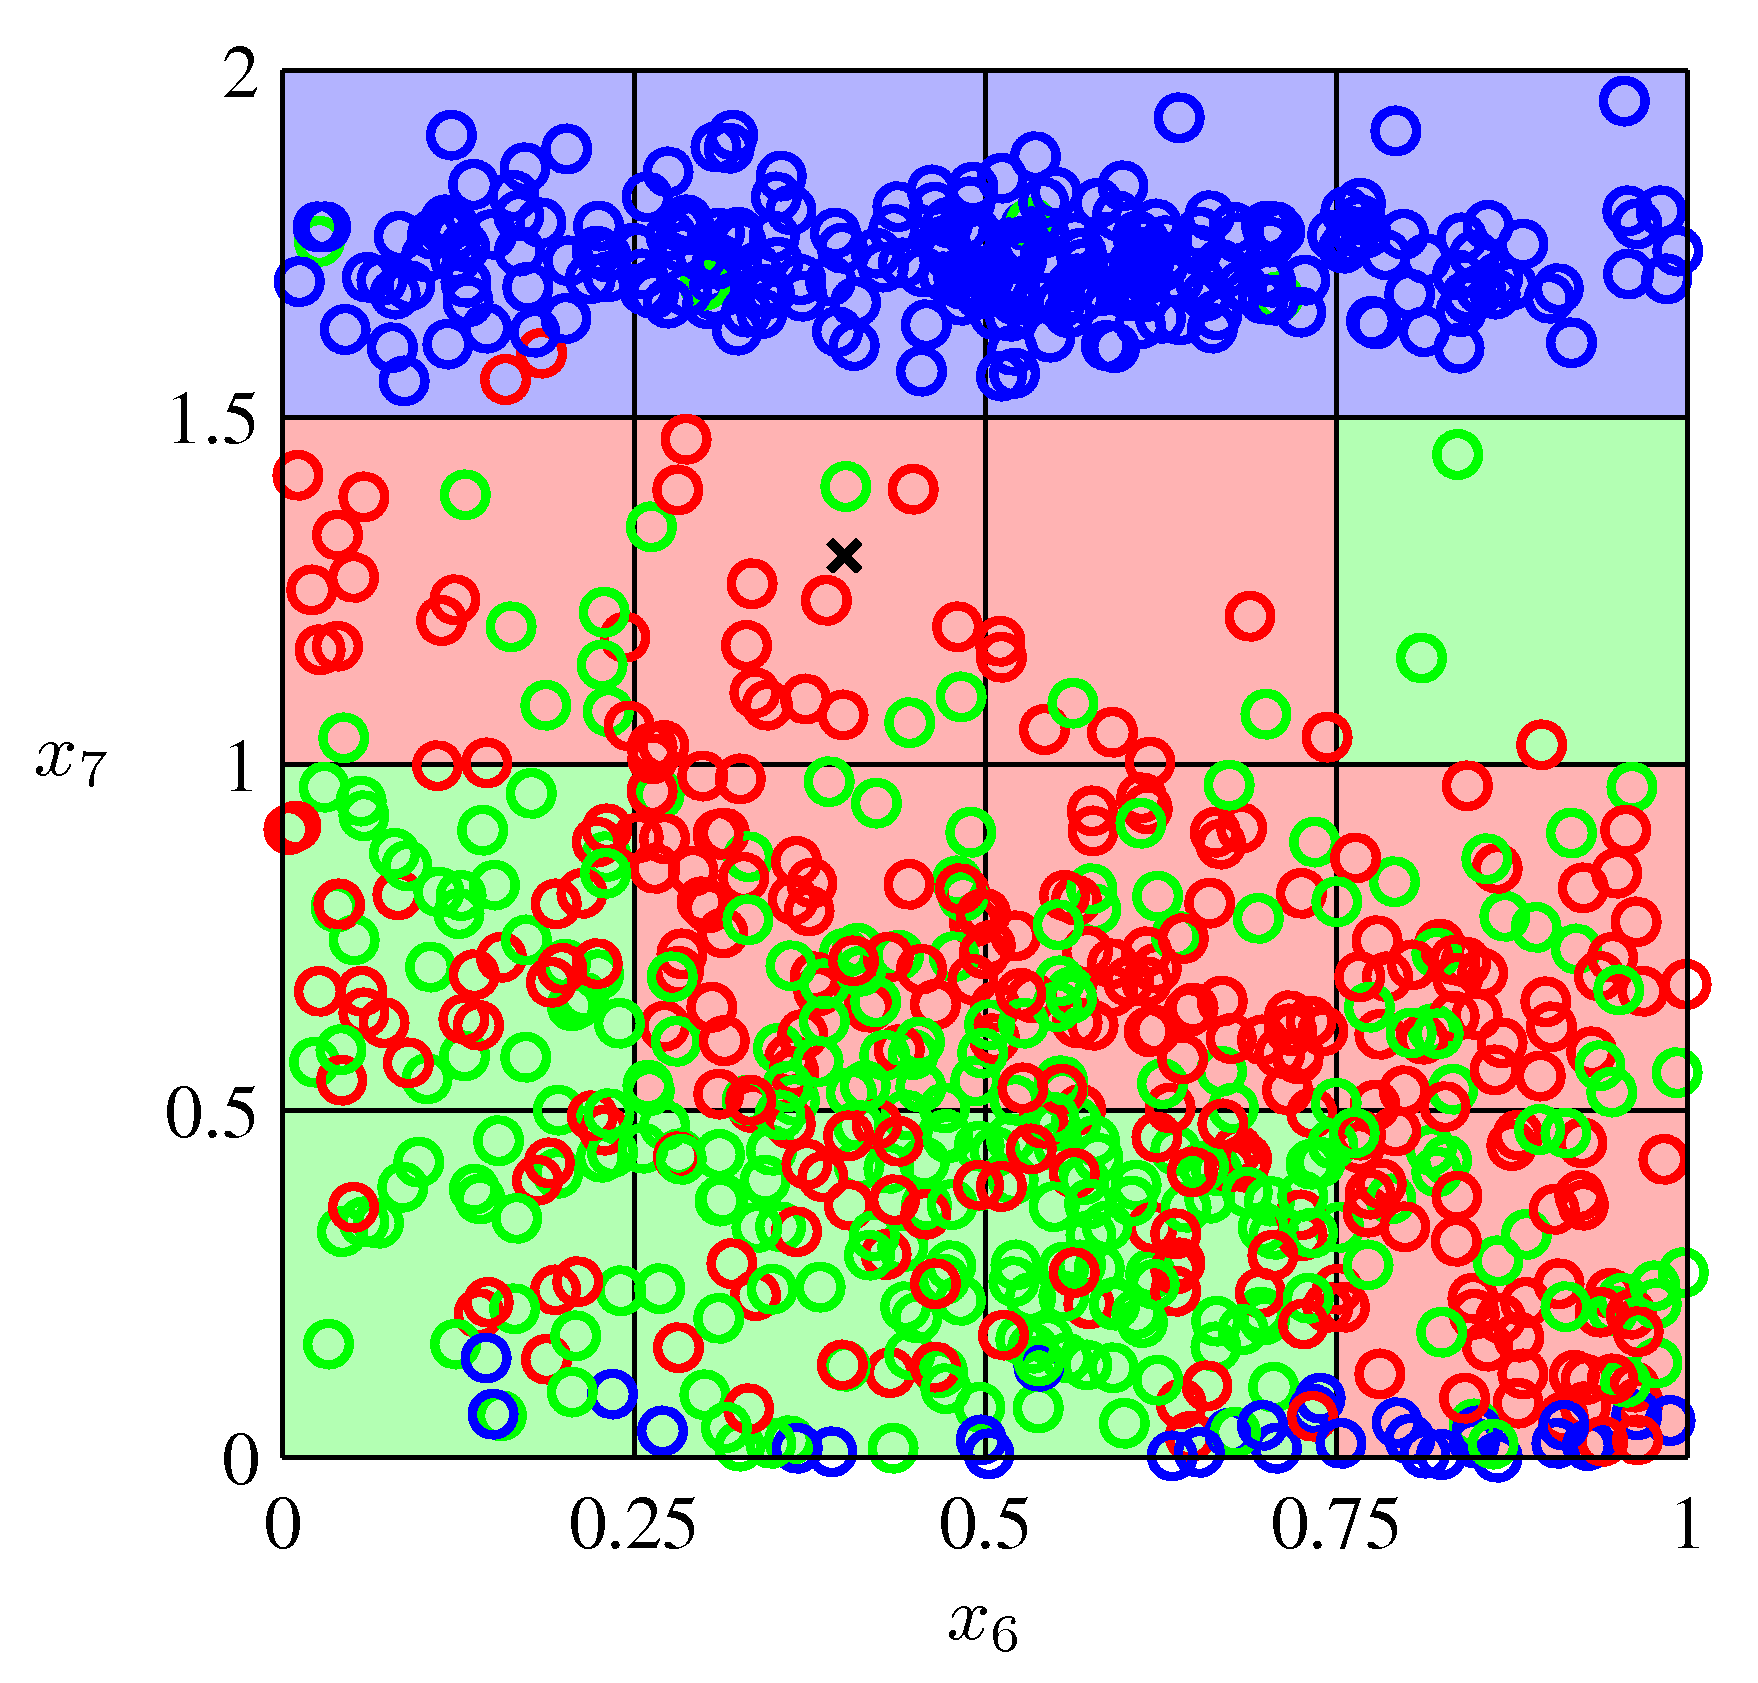

In [3]:
Image('figures/Figure1.20.png', width=400)

**What is the biggest problem with this approach?**

* If we divide a region of a space into regular cells, then the number of such cells grows exponentially with the dimensionality of the space. 

* The problem with an exponentially large number of cells is that we would need an exponentially large quantity of training data in order to ensure that the cells are not empty. 

* Clearly, we have no hope of applying such a technique in a space of more than a few variables, and so we need to find a more sophisticated approach.

We can gain further insight into the problems of high-dimensional spaces by returning to the example of polynomial curve fitting and considering how we would extend this approach to deal with input spaces having several variables. If we have
$D$-dimensional input variables, then a general polynomial with coefficients up to order 3 would take the form:

$$y(\mathbf{x},\mathbf{w}) = w_0 + \sum_{i=1}^D w_ix_i + \sum_{i=1}^D \sum_{j=1}^D w_{ij}x_ix_j + \sum_{i=1}^D \sum_{j=1}^D\sum_{k=1}^D w_{ijk}x_ix_jx_k$$


* As $D$ increases, so the number of independent coefficients grows proportionally to $D^3$. 

* In practice, to capture complex dependencies in the data, we may need to use a higher-order polynomial. For a polynomial of order $M$, the growth in the number of coefficients is $D^M$. 
* Although this is now a power law growth, rather than an exponential growth, it still points to the method becoming rapidly unwieldy and of limited practical utility.

> ## Intuitions do not hold in Higher Dimensional Spaces

Our geometrical intuitions, formed through a life spent in a 3-dimensional space, will not scale to spaces of much higher dimensionality.

Let's illustrate this with two examples.

### Example 1: Volume of a Crust
Let's take the example of the **volume of a crust**.

* Consider two spheres. One sphere $S_1$ with radius $r$, and another sphere $S_2$ with radious $r-\epsilon$.

* The ratio of the crust to the $S_1$ sphere:

$$ratio = \frac{V_{crust}}{V_{S_1}} = \frac{V_{S_1} - V_{S_2}}{V_{S_1}}$$

* The $D$-dimensional [volume of a ball of radius $r$ in $D$-dimensional space](https://en.wikipedia.org/wiki/Volume_of_an_n-ball) is: $V = \frac{r^D \pi^{\frac{D}{2}}}{\Gamma\left(\frac{D}{2}+1\right)}$, then

\begin{align}
ratio &= \frac{V_{S_1} - V_{S_2}}{V_{S_1}} \\
&= 1-\frac{V_{S_2}}{V_{S_1}} \\
&= 1-\frac{\frac{(r-\epsilon)^D \pi^{\frac{D}{2}}}{\Gamma\left(\frac{D}{2}+1\right)}}{\frac{r^D \pi^{\frac{D}{2}}}{\Gamma\left(\frac{D}{2}+1\right)}} \\
&= 1 - \frac{(r-\epsilon)^D}{r^D}\\
&= 1 - \frac{r^D\left(1-\frac{\epsilon}{r}\right)^D}{r^D}\\
&= 1 - \left(1-\frac{\epsilon}{r}\right)^D
\end{align}

* For a fixed value for $\epsilon$, a fixed radius $r$ and $\epsilon<<r$, what happens as $D$ increases?

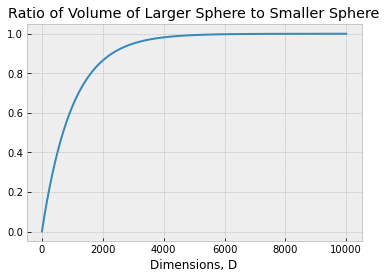

In [33]:
# Crust volume between spheres with epsilon different radii and increasing dimensionality

r = 1
eps = 0.001
D = range(1,10000)

RatioVol = [1-(1-eps/r)**d for d in D]

plt.plot(D, RatioVol)
plt.title('Ratio of Volume of Larger Sphere to Smaller Sphere');
plt.xlabel('Dimensions, D');